TRAINING SET PERFORMANCE (Default Regularization):
Training Set Score: 1.0
Average Probability: 0.9999834237227873 


Regularization Parameter chosen: 1e-05 


VALIDATION SET PERFORMANCE (with noise):
Validation Set Score: 1.0
Average Probability: 0.7557023168524971 


TEST SET PERFORMANCE:
Test Set Score: 1.0
Average Probability 0.8308707142193621 




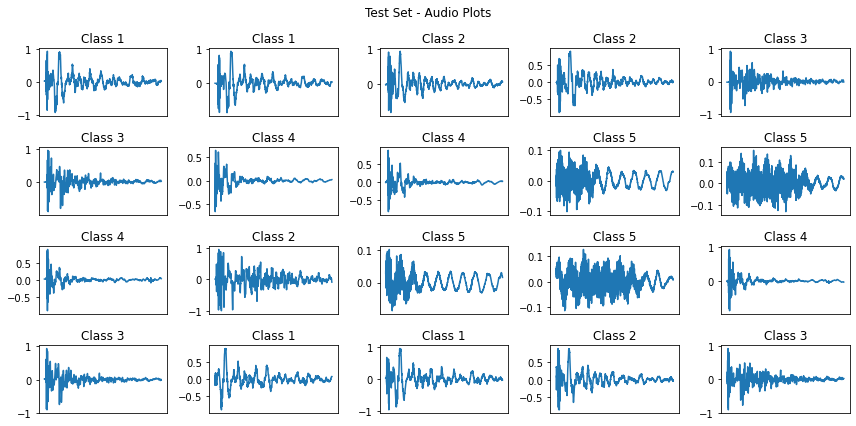

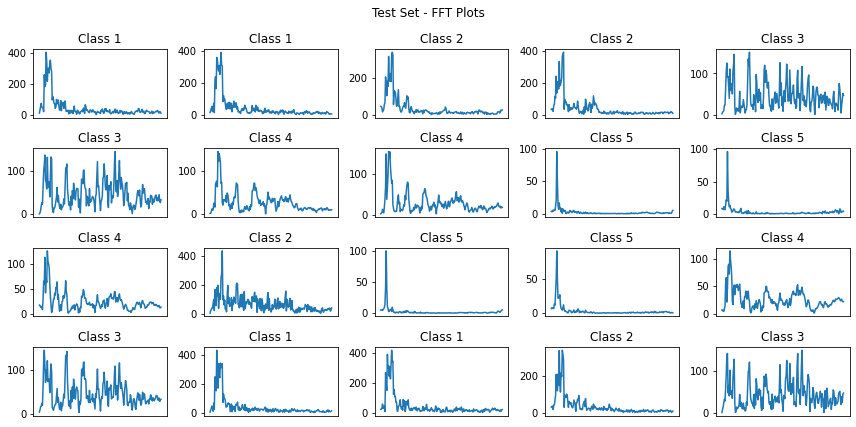

In [458]:

import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import read
from scipy.fftpack import fft
from sklearn.linear_model import LogisticRegression
import warnings



##### These wav files were exported from Audacity, 
##### causing "Chunk (non-data) not understood, skipping it" warnings

warnings.filterwarnings("ignore")




##################################### TRAINING SET INIT #################################### 

# 150 samples: 30 of each input:
# Bop it (closed fist), Slap it (open palm)
# Knock it (single knuckle), Tap it (index finger)
# and Swipe it (single finger swipe)

input_data = read("Training_Data_150.wav")
audio = input_data[1]

i=1200
num = 0
size = len(audio)
FFT_TrainingSet = []

#fig = plt.figure(figsize=(20,100))
#figFFT = plt.figure(figsize=(20,100))


while i<size:
    
            
    if audio[i]>0.07:

        noisedetect = True
        num = num + 1
            
        sample = audio[i-200:i+8000]
        sampleFFT = np.abs(fft(sample))
        sampleFFT = sampleFFT[0:200]
        
        i = i + 48000
    
        #### AUDIO PLOT    
        #datasets = fig1.add_subplot(50,3,num)
        #datasets.plot(sample)
        
        ##### FFT PLOT
        #datasetsFFT = figFFT.add_subplot(50,3,num)
        #datasetsFFT.plot(sampleFFT)
        
        FFT_TrainingSet += [sampleFFT] 
    
    i = i + 48

    
train_labels = []
for i in range(1,6): 
    train_labels += [i for j in range(30)]


    
    
    
##################################### TRAINING SET PERFORMANCE ####################################    
###################################### default regularization ###################################   

print("TRAINING SET PERFORMANCE (Default Regularization):")

clf = LogisticRegression(random_state=0, max_iter=10000).fit(np.abs(FFT_TrainingSet), train_labels)
 
print("Training Set Score:", (clf.score(np.abs(FFT_TrainingSet), train_labels)))

probs = clf.predict_proba(np.abs(FFT_TrainingSet))
probs = probs.max(axis=1)
print("Average Probability:", (probs.mean()), "\n\n")


    
    
##################################### VALIDATION SET INIT ################################# 
#################################### with background noise ################################ 


input_data = read("DatasetVal_10_Noise.wav")
audio = input_data[1]

i=1200
num = 0
size = len(audio)
FFT_ValSet = []

#fig = plt.figure(figsize=(20, 20))
#figFFT = plt.figure(figsize=(20,20))


while i<size:
    
    
    if audio[i]>0.09:

        initial = i-100
        noisedetect = True
        num = num + 1
        
        sample = audio[i-200:i+8000]
        sampleFFT = np.abs(fft(sample))
        sampleFFT = sampleFFT[0:200]
        
        i = i + 48000
        
        ##### AUDIO PLOT    
        #datasets = fig.add_subplot(4,3,num)
        #datasets.plot(sample)
    
        ##### FFT PLOT
        #datasetsFFT = figFFT.add_subplot(4,3,num)
        #datasetsFFT.plot(sampleFFT)
        
        FFT_ValSet += [sampleFFT] 

    
    i = i + 48

    
val_labels = [1, 1, 3, 1, 4, 4, 2, 5, 5, 1]




##################################### CROSS-VALIDATION #################################### 
    
highestscore = 0
highestprob = 0

hyperparameter_scores = np.zeros(10)
hyperparameter_probs = np.zeros(10)


for i in range(0,10): 
    hyperparameter = 10 ** (i-7)   ## Hyperparameters 1e-7 ... 10e2
    clf = LogisticRegression(random_state=0, C=hyperparameters[i], max_iter=10000).fit(np.abs(FFT_TrainingSet), train_labels)
    
    score = clf.score(np.abs(FFT_ValSet), val_labels)
    hyperparameter_scores[i] = score
    
    probs = clf.predict_proba(np.abs(FFT_ValSet))
    probs = probs.max(axis=1)
    hyperparameter_probs[i] = probs.mean()
    
    
            
print("Regularization Parameter chosen:", C, "\n\n")   


    
print("VALIDATION SET PERFORMANCE (with noise):")
    
clf = LogisticRegression(random_state=0, C=C, max_iter=10000).fit(np.abs(FFT_TrainingSet), train_labels)

print("Validation Set Score:", clf.score(np.abs(FFT_ValSet), val_labels))

probs = clf.predict_proba(np.abs(FFT_ValSet))
probs = probs.max(axis=1)
print("Average Probability:", (probs.mean()), "\n\n")

    


##################################### TEST SET INIT #################################### 


input_data = read("DatasetTest_20.wav")
audio = input_data[1]

i=1200
num = 0
size = len(audio)
FFT_TestSet = []

test_labels = (1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 4, 2, 5, 5, 4, 3, 1, 1, 2, 3)

fig = plt.figure(figsize=(12, 6))
fig.suptitle("Test Set - Audio Plots")

figFFT = plt.figure(figsize=(12,6))
figFFT.suptitle("Test Set - FFT Plots")


while i<size:
    
    
    if audio[i]>0.09:

        initial = i-100
        noisedetect = True
        num = num + 1
        
        sample = audio[i-200:i+8000]
        sampleFFT = np.abs(fft(sample))
        sampleFFT = sampleFFT[0:200]
        
        i = i + 48000
        
        ##### AUDIO PLOT    
        datasets = fig.add_subplot(4,5,num)
        datasets.plot(sample)
        datasets.set_title("Class {}".format(test_labels[num-1]))
        datasets.set_xticks([])
    
        ##### FFT PLOT
        datasetsFFT = figFFT.add_subplot(4,5,num)
        datasetsFFT.plot(sampleFFT)
        datasetsFFT.set_title("Class {}".format(test_labels[num-1]))
        datasetsFFT.set_xticks([])
        
        FFT_TestSet += [sampleFFT] 
    
    i = i + 48
    



##################################### TEST SET PERFORMANCE #################################### 


print("TEST SET PERFORMANCE:")

clf = LogisticRegression(random_state=0, C=C, max_iter=10000).fit(np.abs(FFT_TrainingSet), train_labels)
 
#print("Test Set Predictions:")
#print(clf.predict(np.abs(FFT_TestSet)))  
    
print("Test Set Score:", clf.score(np.abs(FFT_TestSet), test_labels))

probs = clf.predict_proba(np.abs(FFT_TestSet))
probs = probs.max(axis=1)
print("Average Probability", (probs.mean()), "\n\n")


    
fig.tight_layout()
figFFT.tight_layout()
